In [1]:
import pandas as pd

df = pd.read_csv(r"file_train.csv")


X = df.drop(['Nusselt Number'], axis=1)
y = df.drop(['Wavelength','Corrugation Amplitude','Reynolds Number'], axis = 1)


In [117]:
import numpy as np

In [2]:
X = X.drop(['Unnamed: 0'], axis=1)
y = y.drop(['Unnamed: 0'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [14]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
history = regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.8798915788465995


In [15]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [22]:
from sklearn.svm import SVR
import numpy as np

regressor = SVR(kernel = 'rbf')
regressor.fit(X, np.ravel(y))

print(regressor.score(X, np.ravel(y)))

0.9888035565351706


In [25]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X, np.ravel(y))
print(reg.score(X, np.ravel(y)))

0.9997226659511164


In [100]:
pre = pd.read_csv(r"predict.csv")
prex = pre.drop(['Nusselt Number'], axis=1)
prey = pre.drop(['Wavelength','Corrugation Amplitude','Reynolds Number'], axis = 1)


In [227]:
y_pred_lr = regr.predict(prex)
y_pred_lr = y_pred_lr.reshape(-1,1)
y_pred_lr = y_pred_lr.flatten()
y_pred_lr

array([ 6.26349397,  6.56713845,  6.87078294,  7.17442742,  7.4780719 ,
        6.79648588,  7.10013036,  7.40377484,  6.29605863,  6.59970311,
        6.9918738 ,  7.29551828,  7.59916276,  6.49144655,  6.79509103,
        7.84545084,  8.14909532,  8.4527398 ,  8.75638428,  9.06002876,
        9.27506883,  9.57871331,  9.88235779, 10.18600227,  6.35202019,
        9.64384262,  9.9474871 , 10.25113158,  6.4171495 ,  6.72079398,
        9.67640727,  9.98005176, 10.28369624,  6.44971415,  6.75335863,
        7.05700311,  7.26295363,  7.56659811,  6.4588819 ,  6.76252638,
        7.06617086,  7.36981534,  6.53317895,  6.83682344,  7.14046792,
        9.84979314, 10.15343762,  6.31945553,  6.62310001,  6.92674449])

In [101]:
scaler_x = StandardScaler()
scaler_x.fit(prex)
scaler_y = StandardScaler()
scaler_y.fit(prey)

StandardScaler()

In [78]:
y_pred_svm = regressor.predict(scaler.transform(prex))

In [104]:
y_pred_rf = reg.predict(scaler.transform(prex))

In [145]:
y_pred_svm = y_pred_svm.reshape(-1,1)
y_pred_svm = y_pred_svm.reshape(-1,1)
y_pred_svm_inv = scaler_y.inverse_transform(y_pred_svm)
y_pred_svm_inv = np.asarray(y_pred_svm_inv)
y_pred_svm_inv = y_pred_svm_inv.flatten()
y_pred_svm_inv = y_pred_svm_inv.flatten()
y_pred_svm_inv

array([5.78049117, 6.12862311, 6.50022969, 6.85815508, 7.18800376,
       6.15000948, 6.53029645, 6.89161203, 5.8923429 , 6.27804754,
       6.7107125 , 7.07027507, 7.39919165, 6.35461924, 6.79385036,
       8.22720465, 8.53734331, 8.85246862, 9.17289285, 9.46526916,
       8.98613135, 9.29861224, 9.5361379 , 9.65413151, 5.87842   ,
       9.21599954, 9.39880221, 9.46534357, 5.96280341, 6.35830318,
       9.09712721, 9.24557324, 9.28343779, 6.00365519, 6.39218467,
       6.78478539, 7.01789997, 7.35089593, 6.32389764, 6.75870928,
       7.17017771, 7.53248622, 6.56838138, 7.01913398, 7.44016737,
       9.57203614, 9.7085348 , 5.82209644, 6.21134298, 6.59871646])

In [139]:
y_pred_rf = y_pred_rf.reshape(-1,1)
y_pred_rf_inv = scaler_y.inverse_transform(y_pred_rf)
y_pred_rf_inv = np.asarray(y_pred_rf_inv)
y_pred_rf_inv = y_pred_rf_inv.flatten()
y_pred_rf_inv = y_pred_rf_inv.flatten()

In [140]:
actual_val = pre[['Nusselt Number']].values

In [141]:
a=[]
for i in (range(50)):
    a.append(i+1)

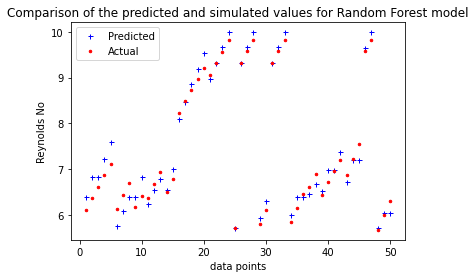

In [228]:
import matplotlib.pyplot as plt

plt.plot(a, y_pred_rf_inv ,  'bo', marker="+", markersize=5 )
plt.plot(a, actual_val, 'o', color='red', marker=".", markersize=5)  
plt.xlabel('data points')
plt.ylabel('Reynolds No')
plt.title('Comparison of the predicted and simulated values for Random Forest model')
plt.legend(["Predicted", "Actual"], loc ="upper left")  
plt.savefig('RFg.jpg', dpi=500, bbox_inches='tight')
plt.show()

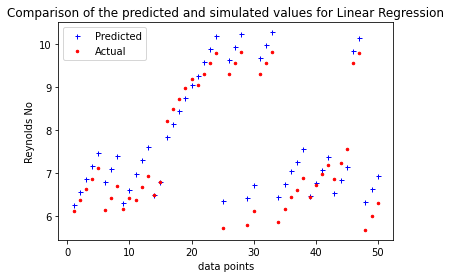

In [229]:

plt.plot(a, y_pred_lr, 'bo', marker="+", markersize=5 )
plt.plot(a, actual_val, 'o', color='red', marker=".", markersize=5 )  
# naming the x axis
plt.xlabel('data points')
# naming the y axis
plt.ylabel('Reynolds No')
  
# giving a title to my graph
plt.title('Comparison of the predicted and simulated values for Linear Regression')
plt.legend(["Predicted", "Actual"], loc ="upper left")   
# function to show the plot

plt.savefig('LRg.jpg', dpi=500, bbox_inches='tight')
plt.show()

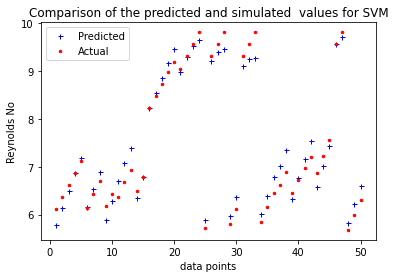

In [230]:
plt.plot(a, y_pred_svm_inv, 'bo', marker="+", markersize=5 )
plt.plot(a, actual_val, 'o',color='red', marker=".", markersize=5 )  
# naming the x axis
plt.xlabel('data points')
# naming the y axis
plt.ylabel('Reynolds No')
  
# giving a title to my graph
plt.title('Comparison of the predicted and simulated  values for SVM')
plt.legend(["Predicted", "Actual"], loc ="upper left") 
plt.savefig('SVMg.jpg', dpi=500, bbox_inches='tight')
# function to show the plot
plt.show()

In [233]:
y_pred_svm_inv = y_pred_svm_inv.reshape(-1,1)

In [234]:
y_pred_svm_inv

array([[5.78049117],
       [6.12862311],
       [6.50022969],
       [6.85815508],
       [7.18800376],
       [6.15000948],
       [6.53029645],
       [6.89161203],
       [5.8923429 ],
       [6.27804754],
       [6.7107125 ],
       [7.07027507],
       [7.39919165],
       [6.35461924],
       [6.79385036],
       [8.22720465],
       [8.53734331],
       [8.85246862],
       [9.17289285],
       [9.46526916],
       [8.98613135],
       [9.29861224],
       [9.5361379 ],
       [9.65413151],
       [5.87842   ],
       [9.21599954],
       [9.39880221],
       [9.46534357],
       [5.96280341],
       [6.35830318],
       [9.09712721],
       [9.24557324],
       [9.28343779],
       [6.00365519],
       [6.39218467],
       [6.78478539],
       [7.01789997],
       [7.35089593],
       [6.32389764],
       [6.75870928],
       [7.17017771],
       [7.53248622],
       [6.56838138],
       [7.01913398],
       [7.44016737],
       [9.57203614],
       [9.7085348 ],
       [5.822

In [237]:
y_pred_lr = y_pred_lr.reshape(-1,1)

In [238]:
y_pred_lr

array([[ 6.26349397],
       [ 6.56713845],
       [ 6.87078294],
       [ 7.17442742],
       [ 7.4780719 ],
       [ 6.79648588],
       [ 7.10013036],
       [ 7.40377484],
       [ 6.29605863],
       [ 6.59970311],
       [ 6.9918738 ],
       [ 7.29551828],
       [ 7.59916276],
       [ 6.49144655],
       [ 6.79509103],
       [ 7.84545084],
       [ 8.14909532],
       [ 8.4527398 ],
       [ 8.75638428],
       [ 9.06002876],
       [ 9.27506883],
       [ 9.57871331],
       [ 9.88235779],
       [10.18600227],
       [ 6.35202019],
       [ 9.64384262],
       [ 9.9474871 ],
       [10.25113158],
       [ 6.4171495 ],
       [ 6.72079398],
       [ 9.67640727],
       [ 9.98005176],
       [10.28369624],
       [ 6.44971415],
       [ 6.75335863],
       [ 7.05700311],
       [ 7.26295363],
       [ 7.56659811],
       [ 6.4588819 ],
       [ 6.76252638],
       [ 7.06617086],
       [ 7.36981534],
       [ 6.53317895],
       [ 6.83682344],
       [ 7.14046792],
       [ 9

In [239]:
y_pred_rf_inv = y_pred_rf_inv.reshape(-1,1)

In [240]:
y_pred_rf_inv

array([[6.40434368],
       [6.83160337],
       [6.83160337],
       [7.2258275 ],
       [7.5869971 ],
       [5.76910881],
       [6.09723608],
       [6.40061144],
       [6.40434368],
       [6.83160337],
       [6.24691252],
       [6.55638668],
       [6.78593079],
       [6.55399707],
       [7.00600188],
       [8.08698002],
       [8.47516094],
       [8.85079436],
       [9.18844754],
       [9.52498457],
       [8.96658627],
       [9.32136412],
       [9.65703048],
       [9.98641223],
       [5.71753679],
       [9.31937052],
       [9.65833107],
       [9.98798541],
       [5.94508051],
       [6.29743485],
       [9.31972584],
       [9.65887219],
       [9.98818477],
       [5.99860681],
       [6.38541798],
       [6.38541798],
       [6.46588509],
       [6.68454031],
       [6.52816698],
       [6.9789146 ],
       [6.9789146 ],
       [7.37207955],
       [6.73110662],
       [7.19963667],
       [7.19963667],
       [9.65364406],
       [9.9837256 ],
       [5.709